In [108]:
import torch
import torch.nn as nn
# Import the dataset MNIST
from torchvision import datasets, transforms
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import matplotlib.pyplot as plt
import numpy as np


In [109]:
class AutoEncoder(nn.Module):
    def __init__(self, latent_size):
        super(AutoEncoder, self).__init__()
        self.laten_size = latent_size
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, latent_size),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(latent_size, 64),
            nn.ReLU(),
            nn.Linear(64, 128),
            nn.ReLU(),
            nn.Linear(128, 784),
            nn.Sigmoid()
        )
        self.loss = nn.MSELoss()

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
    def encode(self, x):
        return self.encoder(x)
    
    def decode(self, x):
        return self.decoder(x)
    
    def loss_function(self, x):
        return self.loss(x, self.forward(x))
    
    def get_latent(self, x):
        return self.encode(x)
    
    def get_reconstruction(self, x):
        return self.decode(x)
    

In [110]:
# Loading the dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor(), download=True)

# Creating the dataloader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, batch_size=128, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, batch_size=128, shuffle=False)

In [111]:
# Defining training function

def train(model, train_loader, optimizer, epoch):
    model.train()
    train_loss = 0
    for batch_idx, (data, _) in enumerate(train_loader):

        data = data.view(-1, 784)
        optimizer.zero_grad()
        loss = model.loss_function(data)
        loss.backward()
        train_loss += loss.item()
        optimizer.step()
    print('====> Epoch: {} Average loss: {:.4f}'.format(
          epoch, train_loss / len(train_loader.dataset)))
    return train_loss / len(train_loader.dataset)

In [112]:
# Testing function

def test(model, test_loader):
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for i, (data,_) in enumerate(test_loader):
            # print(type(data))
            data = data.view(-1, 784)
            test_loss += model.loss_function(data).item()
    test_loss /= len(test_loader.dataset)
    print('====> Test set loss: {:.4f}'.format(test_loss))
    return test_loss


In [113]:
# Training the model
model1 = AutoEncoder(32)

# Defining the optimizer
optimizer1 = torch.optim.Adam(model1.parameters(), lr=1e-3)

# Defining the number of epochs
epochs1 = 10

# Training loop
for epoch in range(1, epochs1 + 1):
    train(model1, train_loader, optimizer1, epoch)
    test(model1, test_loader)

    

====> Epoch: 1 Average loss: 0.0005
====> Test set loss: 0.0003
====> Epoch: 2 Average loss: 0.0003
====> Test set loss: 0.0002
====> Epoch: 3 Average loss: 0.0002
====> Test set loss: 0.0002
====> Epoch: 4 Average loss: 0.0002
====> Test set loss: 0.0002
====> Epoch: 5 Average loss: 0.0002
====> Test set loss: 0.0002
====> Epoch: 6 Average loss: 0.0002
====> Test set loss: 0.0002
====> Epoch: 7 Average loss: 0.0001
====> Test set loss: 0.0001
====> Epoch: 8 Average loss: 0.0001
====> Test set loss: 0.0001
====> Epoch: 9 Average loss: 0.0001
====> Test set loss: 0.0001
====> Epoch: 10 Average loss: 0.0001
====> Test set loss: 0.0001


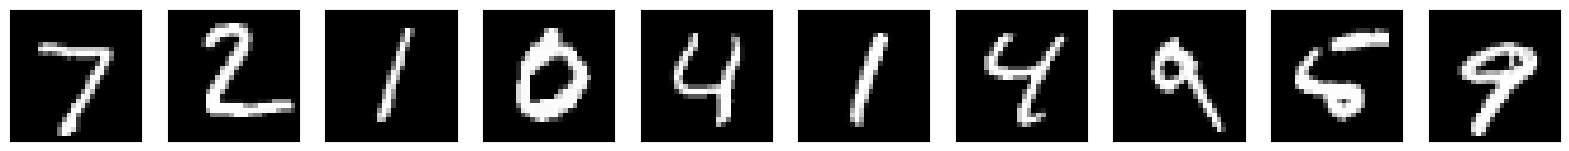

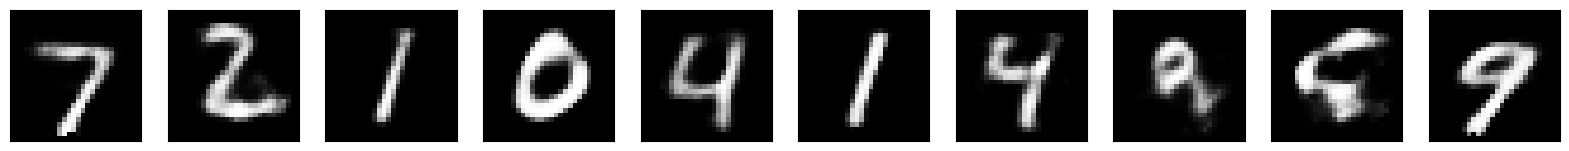

In [114]:

# Plotting the original images
fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for i in range(10):
    axes[i].imshow(np.reshape(test_dataset[i][0], (28,28)), cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

# Plotting the reconstructed images
fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for i in range(10):
    # Normalising the image test_dataset[i][0]
    a = model1.get_latent(test_dataset[i][0].view(-1, 784))
    a = model1.get_reconstruction(a)
    a = a.detach().numpy()
    a = np.reshape(a, (28,28))
    axes[i].imshow(a, cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()


In [115]:
model2 = AutoEncoder(64)

# Defining the optimizer
optimizer2 = torch.optim.Adam(model2.parameters(), lr=1e-3)

# Defining the number of epochs
epochs2 = 10

# Training loop
for epoch in range(1, epochs2 + 1):
    train(model2, train_loader, optimizer2, epoch)
    test(model2, test_loader)


====> Epoch: 1 Average loss: 0.0005
====> Test set loss: 0.0003
====> Epoch: 2 Average loss: 0.0003
====> Test set loss: 0.0002
====> Epoch: 3 Average loss: 0.0002
====> Test set loss: 0.0002
====> Epoch: 4 Average loss: 0.0002
====> Test set loss: 0.0002
====> Epoch: 5 Average loss: 0.0002
====> Test set loss: 0.0001
====> Epoch: 6 Average loss: 0.0001
====> Test set loss: 0.0001
====> Epoch: 7 Average loss: 0.0001
====> Test set loss: 0.0001
====> Epoch: 8 Average loss: 0.0001
====> Test set loss: 0.0001
====> Epoch: 9 Average loss: 0.0001
====> Test set loss: 0.0001
====> Epoch: 10 Average loss: 0.0001
====> Test set loss: 0.0001


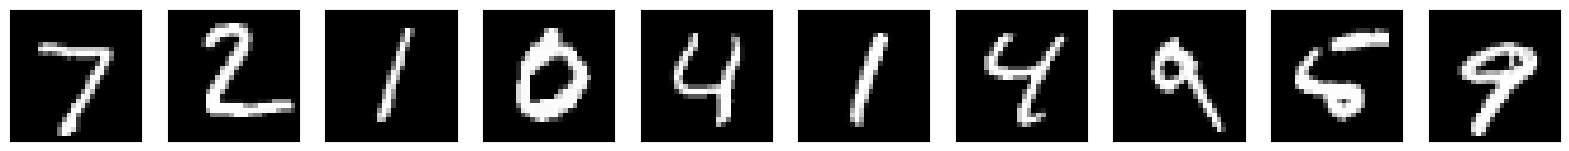

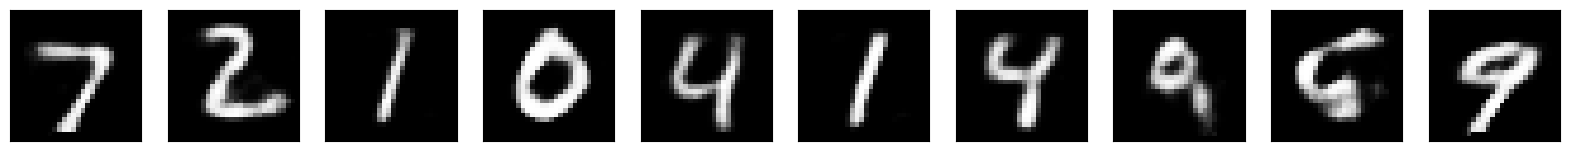

In [116]:
# Plotting the original images
fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for i in range(10):
    axes[i].imshow(np.reshape(test_dataset[i][0], (28,28)), cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()

# Plotting the reconstructed images for 64 latent size

fig, axes = plt.subplots(nrows=1, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for i in range(10):
    # Normalising the image test_dataset[i][0]
    a = model2.get_latent(test_dataset[i][0].view(-1, 784))
    a = model2.get_reconstruction(a)
    a = a.detach().numpy()
    a = np.reshape(a, (28,28))
    axes[i].imshow(a, cmap='gray')
    axes[i].get_xaxis().set_visible(False)
    axes[i].get_yaxis().set_visible(False)
plt.show()



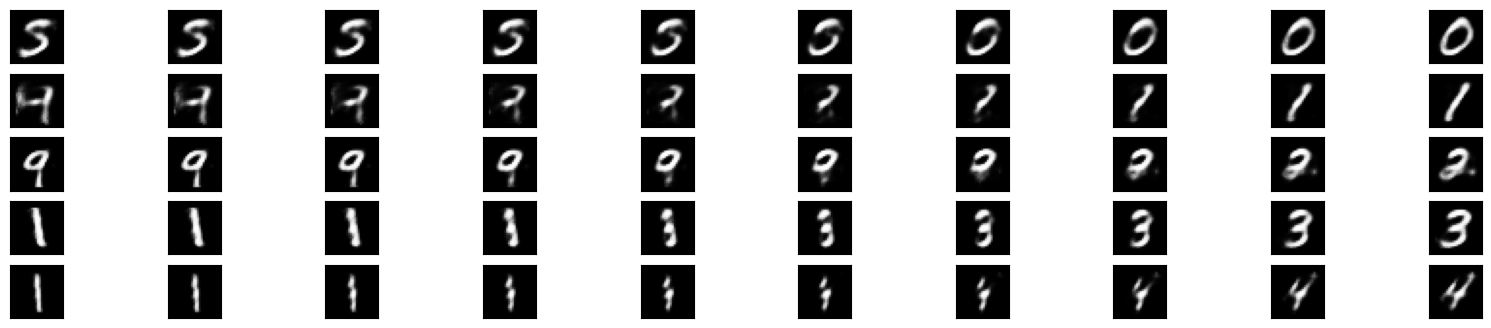

In [118]:
# reconstruction on the line joining two training data samples in the hidden space for 5 pairs of samples
# Plotting the reconstructed images for 64 latent size

fig, axes = plt.subplots(nrows=5, ncols=10, sharex=True, sharey=True, figsize=(20,4))
for i in range(5):
    # Normalising the image test_dataset[i][0]
    a = model2.get_latent(train_dataset[2*i][0].view(-1, 784))
    b = model2.get_latent(train_dataset[2*i+1][0].view(-1, 784))
    for j in range(10):
        c = a + (j/10)*(b-a)
        c = model2.get_reconstruction(c)
        c = c.detach().numpy()
        c = np.reshape(c, (28,28))
        axes[i][j].imshow(c, cmap='gray')
        axes[i][j].get_xaxis().set_visible(False)
        axes[i][j].get_yaxis().set_visible(False)